In [ ]:

#> GENERAL TESTING 1
def genit(l:list):
    yield l
fl = [0,5,13,349,50,2,5,3,7]
fl+= [4]
print(fl)
print(genit(fl))

[0, 5, 13, 349, 50, 2, 5, 3, 7, 4]
<generator object genit at 0x00000220B9A9A080>


In [38]:

#[ GENERAL TESTING  2 ]

o1 = [i for i in range(0,10)]
o2 = (i for i in range(0,10))
print(type(o1), " | ", type(o2))

<class 'list'>  |  <class 'generator'>


In [ ]:
from random import randbytes
from icecream import ic
r = randbytes(1000)
rlo = [b>>4 for b in r]

nx = "low"
ny = "hi"
bx = 32
by = 188
mdifX = 127-32
mdifY = 188-127
op = 0b10000000
xorX = bx^op
xorY = by^op
xordX = mdifX^op
xordY = mdifY^op

ic(nx, bx, mdifX, xorX, xordX)
ic(ny, by, mdifY, xorY, xordY)



# what are differences:


ic| nx: 'low', bx: 32, mdifX: 95, xorX: 160, xordX: 223
ic| ny: 'hi', by: 188, mdifY: 61, xorY: 60, xordY: 189


('hi', 188, 61, 60, 189)

In [ ]:

#*= BYTE LOGIC TESTING 1
#~ RUN FOR FUNCTIONS, IMPORTS
#==============================
from icecream import ic
from random import randbytes

mhi = 0b11110000 
mlo = 0b00001111
#df = pl.LazyFrame()
#blist = randbytes(100000)



def yieldall(bl:list):
    ha, hb, la, lb, lc, x1, x2, x3, x4 = [],[],[],[],[],[],[],[],[]
    for b in bl:
        hiA_AND = b & mhi
        hiB_LS_AND = (b<<4) & mhi
        lowA_AND = b & mlo
        lowB_RS = b>>4
        lowC_LS_AND = hiB_LS_AND>>4

        xor1 = hiA_AND^lowA_AND
        xor2 = hiB_LS_AND^lowC_LS_AND
        xor3 = lowA_AND^lowB_RS^lowC_LS_AND
        xor4 = xor1^xor2
        #bbyt = f'{b:08b}'
        line = [b, lowA_AND,lowB_RS,lowC_LS_AND,hiA_AND,hiB_LS_AND,xor1,xor2,xor3,xor4]
        lineg = []
        yield line

def genit(l:list):
    yield l
    
def makegenerators(bl:list):
    ha, hb, la, lb, lc, x1, x2, x3, x4 = [],[],[],[],[],[],[],[],[]
    for i,b in enumerate(bl):
        ha+= [b & mhi]
        hb+= [(b<<4) & mhi]
        la+= [b & mlo]
        lb +=[ b>>4]
        lc += [hb[i]>>4]

        x1 += [ha[i]^la[i]]
        x2 += [hb[i]^lc[i]]
        x3 += [la[i]^lb[i]^lc[i]]
        x4 += [x1[i]^x2[i]]
        #bbyt = f'{b:08b}'
        #lowA_AND,lowB_RS,lowC_LS_AND,hiA_AND,hiB_LS_AND,xor1,xor2,xor3,xor4
        line = [genit(b), genit(la),genit(lb),genit(lc),genit(ha),
                genit(hb),genit(x1),genit(x2),genit(x3),genit(x4)]
        return line

bt = randbytes(4)
for byt in makegenerators(bt):
    ic(next(byt))

for byt in yieldall(bt):
    ic(byt)
#1. and trim



ic| next(byt): 243
ic| next(byt): [3]
ic| next(byt): [15]
ic| next(byt): [3]
ic| next(byt): [240]
ic| next(byt): [48]
ic| next(byt): [243]
ic| next(byt): [51]
ic| next(byt): [15]
ic| next(byt): [192]
ic| byt: [243, 3, 15, 3, 240, 48, 243, 51, 15, 192]
ic| byt: [199, 7, 12, 7, 192, 112, 199, 119, 12, 176]
ic| byt: [22, 6, 1, 6, 16, 96, 22, 102, 1, 112]
ic| byt: [67, 3, 4, 3, 64, 48, 67, 51, 4, 112]


In [28]:
import polars as pl
import numpy as np
#*= BYTE LOGIC TESTING 1
#~ MAKE POLARS LAZYFRAME
#==============================
#schema:
tb = type(mhi)
columns = ["BYTE","lowA AND","lowB ShiftR","lowC ShiftAnd","hiA AND", "hiB ShiftAnd", 
           "XOR1h: hiAxlowA","XOR2h:hiBxlowC", "XOR3l: lowAxlowBxlowC","XOR4l:XOR1xXOR2"]
schem = {"BYTE":tb,"lowA AND":tb,
       "lowB ShiftR":tb,"lowC ShiftAnd":tb,
       "hiA AND":tb,"hiB ShiftAnd":tb,
       "XOR1h: hiAxlowA":tb,"XOR2h:hiBxlowC":tb,
       "XOR3l: lowAxlowBxlowC":tb,"XOR4l:XOR1xXOR2":tb}
#> Lazyframe Dataset:
#> lzset = dict(zip(columns, makegenerators(randbytes(10000))))
genr = yieldall(randbytes(5100))
dl = [g for g in genr]
arr = np.array(dl)
df = pl.DataFrame(dl,columns,orient="row")
print(df)

shape: (5_100, 10)
┌──────┬──────────┬────────┬─────────────┬───┬─────────────┬─────────────┬────────────┬────────────┐
│ BYTE ┆ lowA AND ┆ lowB   ┆ lowC        ┆ … ┆ XOR1h:      ┆ XOR2h:hiBxl ┆ XOR3l: low ┆ XOR4l:XOR1 │
│ ---  ┆ ---      ┆ ShiftR ┆ ShiftAnd    ┆   ┆ hiAxlowA    ┆ owC         ┆ AxlowBxlow ┆ xXOR2      │
│ i64  ┆ i64      ┆ ---    ┆ ---         ┆   ┆ ---         ┆ ---         ┆ C          ┆ ---        │
│      ┆          ┆ i64    ┆ i64         ┆   ┆ i64         ┆ i64         ┆ ---        ┆ i64        │
│      ┆          ┆        ┆             ┆   ┆             ┆             ┆ i64        ┆            │
╞══════╪══════════╪════════╪═════════════╪═══╪═════════════╪═════════════╪════════════╪════════════╡
│ 12   ┆ 12       ┆ 0      ┆ 12          ┆ … ┆ 12          ┆ 204         ┆ 0          ┆ 192        │
│ 15   ┆ 15       ┆ 0      ┆ 15          ┆ … ┆ 15          ┆ 255         ┆ 0          ┆ 240        │
│ 215  ┆ 7        ┆ 13     ┆ 7           ┆ … ┆ 215         ┆ 119        

In [61]:
# How to pull columns:
col = df.get_column("BYTE")

multcol = df.get_columns()[7:]

print(col.head(5))
print(type(col))
print(type(multcol))
print(multcol)


shape: (5,)
Series: 'BYTE' [i64]
[
	12
	15
	215
	73
	240
]
<class 'polars.series.series.Series'>
<class 'list'>
[shape: (5_100,)
Series: 'XOR2h:hiBxlowC' [i64]
[
	204
	255
	119
	153
	0
	…
	68
	85
	136
	238
	204
], shape: (5_100,)
Series: 'XOR3l: lowAxlowBxlowC' [i64]
[
	0
	0
	13
	4
	15
	…
	10
	0
	12
	0
	14
], shape: (5_100,)
Series: 'XOR4l:XOR1xXOR2' [i64]
[
	192
	240
	160
	208
	240
	…
	224
	80
	64
	224
	32
]]


<Axes: ylabel='Count'>

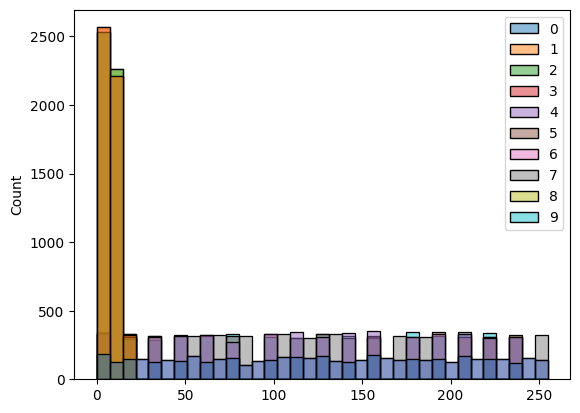

In [67]:
import seaborn as sns


sns.histplot(df)
#print(df['BYTE'])